<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/Salaire_et_Emploi_sur_linkedin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


# **Emploi sur linkedin**

In [2]:
#IMPORTING THR LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import GridSearchCV, cross_val_score


In [3]:
from google.colab import files
data_to_load = files.upload()

Saving LinkedInJobs_MLDataset.csv to LinkedInJobs_MLDataset.csv


In [5]:
df = pd.read_csv('/content/LinkedInJobs_MLDataset.csv')
df.head()

,Co_Nm,Co_Pg_Lstd,Emp_Cnt,Flw_Cnt,Job_Ttl,Job_Desc,Is_Supvsr,max_sal,med_sal,min_sal,...,st_code,is_remote,views,app_typ,app_is_off,xp_lvl,domain,has_post_domain,is_sponsored,base_comp
0,HearingLife,True,1171,11417,Hearing Care Provider,Overview\n\nHearingLife is a national hearing ...,False,5250.00,5250.00,5250.00,...,SC,0,9,OffsiteApply,True,Entry level,careers-demant.icims.com,True,0,1
1,"Metalcraft of Mayville, Inc.",True,300,2923,Shipping & Receiving Associate 2nd shift (Beav...,Metalcraft of Mayville\nMetalcraft of Mayville...,False,0.00,0.00,0.00,...,WI,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,"Manager, Engineering",The TSUBAKI name is synonymous with excellence...,True,0.00,0.00,0.00,...,AL,0,0,OffsiteApply,True,Not Listed,www.click2apply.net,True,0,0
3,Episcopal Communities & Services,True,36,305,Cook,descriptionTitle\n\n Looking for a great oppor...,False,22.27,22.27,22.27,...,CA,0,1,OffsiteApply,True,Entry level,jobs.apploi.com,True,0,1
4,"iHerb, LLC",True,1227,51933,Principal Cloud Security Architect (Remote),"Job Summary\nAt iHerb, we are on a mission to ...",False,275834.00,240895.00,205956.00,...,XF,1,0,OffsiteApply,True,Mid-Senior level,careers.iherb.com,True,0,1


In [6]:
# Define new column names
new_column_names = {
 'Co_Nm': 'Company_Name',
 'Co_Pg_Lstd': 'Company_Page_Listed',
 'Emp_Cnt': 'Employee_Count',
 'Flw_Cnt': 'Followers_Count',
 'Job_Ttl': 'Job_Title',
 'Job_Desc': 'Job_Description',
 'Is_Supvsr': 'Is_Supervisor',
 'max_sal': 'Max_Salary',
 'med_sal': 'Median_Salary',
 'min_sal': 'Min_Salary',
 'py_prd': 'Posting_Period',
 'py_lstd': 'Posting_Listed',
 'wrk_typ': 'Work_Type',
 'loc': 'Location',
 'st_code': 'State_Code',
 'is_remote': 'Is_Remote',
 'views': 'Views',
 'app_typ': 'Application_Type',
 'app_is_off': 'Application_Is_Offsite',
 'xp_lvl': 'Experience_Level',
 'domain': 'Domain',
 'has_post_domain': 'Has_Posting_Domain',
 'is_sponsored': 'Is_Sponsored',
 'base_comp': 'Base_Compensation'
}
# Rename columns
df.rename(columns=new_column_names, inplace=True)
# Check the updated column names
print(df.columns)


Index(['Company_Name', 'Company_Page_Listed', 'Employee_Count',
       'Followers_Count', 'Job_Title', 'Job_Description', 'Is_Supervisor',
       'Max_Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period',
       'Posting_Listed', 'Work_Type', 'Location', 'State_Code', 'Is_Remote',
       'Views', 'Application_Type', 'Application_Is_Offsite',
       'Experience_Level', 'Domain', 'Has_Posting_Domain', 'Is_Sponsored',
       'Base_Compensation'],
      dtype='object')


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Followers_Count         33246 non-null  int64  
 4   Job_Title               33246 non-null  object 
 5   Job_Description         33244 non-null  object 
 6   Is_Supervisor           33246 non-null  bool   
 7   Max_Salary              33246 non-null  float64
 8   Median_Salary           33246 non-null  float64
 9   Min_Salary              33246 non-null  float64
 10  Posting_Period          33246 non-null  object 
 11  Posting_Listed          33246 non-null  bool   
 12  Work_Type               33246 non-null  object 
 13  Location                33246 non-null  object 
 14  State_Code              33246 non-null

In [8]:

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Employee_Count,33246.0,15484.558744,6.218095e+04,0.0,148.00,1235.0,8160.0000,829111.0
Followers_Count,33246.0,523436.391055,2.708736e+06,0.0,8135.75,37996.5,168036.0000,31887198.0
Max_Salary,33246.0,31866.146792,6.823853e+04,0.0,0.00,0.0,97.9675,1300000.0
Median_Salary,33246.0,27494.954904,5.790564e+04,0.0,0.00,0.0,90.0000,1050000.0
Min_Salary,33246.0,23123.763015,4.897738e+04,0.0,0.00,0.0,84.7850,998426.0
Is_Remote,33246.0,0.144438,3.515390e-01,0.0,0.00,0.0,0.0000,1.0
Views,33246.0,45.424592,1.269727e+02,0.0,1.00,7.0,38.0000,5656.0
Is_Sponsored,33246.0,0.244150,4.295884e-01,0.0,0.00,0.0,0.0000,1.0
Base_Compensation,33246.0,0.401612,4.902317e-01,0.0,0.00,0.0,1.0000,1.0


In [9]:
#check the NA counts
df.isna().sum()


Company_Name                  4
Company_Page_Listed           0
Employee_Count                0
Followers_Count               0
Job_Title                     0
Job_Description               2
Is_Supervisor                 0
Max_Salary                    0
Median_Salary                 0
Min_Salary                    0
Posting_Period                0
Posting_Listed                0
Work_Type                     0
Location                      0
State_Code                    0
Is_Remote                     0
Views                         0
Application_Type              0
Application_Is_Offsite        0
Experience_Level              0
Domain                    13558
Has_Posting_Domain            0
Is_Sponsored                  0
Base_Compensation             0
dtype: int64

In [10]:
df.shape


(33246, 24)

In [11]:
#Checking the number of unique values
df.select_dtypes(include='int64').nunique()


Employee_Count       3829
Followers_Count      9119
Is_Remote               2
Views                 789
Is_Sponsored            2
Base_Compensation       2
dtype: int64

In [ ]:
#Checking the number of unique values
df.select_dtypes(include='float64').nunique()


Max_Salary       2709
Median_Salary    3186
Min_Salary       2457
dtype: int64

In [12]:
#Checking the number of unique values
df.select_dtypes(include='object').nunique()

Company_Name        11267
Job_Title           22290
Job_Description     30139
Posting_Period          7
Work_Type               7
Location             4621
State_Code             53
Application_Type        3
Experience_Level        7
Domain               2576
dtype: int64

In [13]:
#Checking the number of unique values
df.select_dtypes(include='bool').nunique()


Company_Page_Listed       2
Is_Supervisor             2
Posting_Listed            2
Application_Is_Offsite    2
Has_Posting_Domain        2
dtype: int64

In [14]:
#job title has many unique values; lets visualize them
df.Job_Title.unique()


array(['Hearing Care Provider',
       'Shipping & Receiving Associate 2nd shift (Beaver Dam)',
       'Manager, Engineering', ..., 'Senior Auditor - Financial Services',
       'Travel Registered Nurse OR Operating Room - 680168',
       'Travel Surgical Tech - 680145'], dtype=object)

In [15]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower() # Convert to lowercase for case-insensitive matching
    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_Job_Title'] = df['Job_Title'].apply(categorize_job_title)
# Check the unique values in the new column
print(df['Categorized_Job_Title'].unique())



['Other' 'Engineering' 'Architect' 'Management' 'Technician'
 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist' 'Developer'
 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [16]:
# Print the count values of all categories
category_counts = df['Categorized_Job_Title'].value_counts()
print(category_counts)


Other             12439
Management         5116
Engineering        3262
Specialist         1740
Analyst            1528
Technician         1265
Assistant          1158
Sales              1140
Nursing            1122
Coordinator         732
Representative      727
Developer           688
Supervisor          521
Consultant          478
Architect           387
Designer            314
Administrator       299
Research            171
Technologist        159
Name: Categorized_Job_Title, dtype: int64


In [17]:
# Define a function to categorize job titles
def categorize_job_title(title):
    title_lower = title.lower() # Convert to lowercase for case-insensitive matching
    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with categorized job titles
df['Categorized_Job_Title'] = df['Job_Title'].apply(categorize_job_title)
# Check the unique values in the new column
print(df['Categorized_Job_Title'].unique())



['Reduced_Other' 'Other' 'Engineering' 'Architect' 'Management'
 'Technician' 'Representative' 'Designer' 'Analyst' 'Nursing' 'Specialist'
 'Developer' 'Sales' 'Supervisor' 'Coordinator' 'Assistant' 'Consultant'
 'Administrator' 'Research' 'Technologist']


In [18]:
# Print the count values of all categories
category_counts = df['Categorized_Job_Title'].value_counts()
print(category_counts)


Reduced_Other     6487
Other             5952
Management        5116
Engineering       3262
Specialist        1740
Analyst           1528
Technician        1265
Assistant         1158
Sales             1140
Nursing           1122
Coordinator        732
Representative     727
Developer          688
Supervisor         521
Consultant         478
Architect          387
Designer           314
Administrator      299
Research           171
Technologist       159
Name: Categorized_Job_Title, dtype: int64


In [19]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
# Function to extract and count words in job titles
def count_words_in_category(category):
    words = ' '.join(df[df['Categorized_Job_Title'] == category]['Job_Title']).lower()
    word_counts = Counter(words)
    return word_counts
# Get word counts for "Other" category
other_word_counts = count_words_in_category('Other')
print("Word counts in 'Other' category:")
print(other_word_counts.most_common(50)) # Adjust the number as needed
print("\n-----------------------------\n")
# Get word counts for "Reduced_Other" category
reduced_other_word_counts = count_words_in_category('Reduced_Other')
print("Word counts in 'Reduced_Other' category:")
print(reduced_other_word_counts.most_common(50)) # Adjust the number as needed



Word counts in 'Other' category:
[(' ', 36523), ('e', 23396), ('r', 17113), ('a', 17111), ('i', 16858), ('t', 16852), ('n', 13945), ('o', 13622), ('s', 12786), ('c', 11156), ('l', 9055), ('d', 6382), ('p', 6027), ('m', 5893), ('u', 5436), ('h', 4400), ('-', 4030), ('g', 3692), ('f', 3471), ('v', 2805), ('y', 2549), ('b', 2036), ('k', 1685), (',', 1676), ('w', 1461), ('2', 1234), ('0', 1192), ('(', 1136), (')', 1136), ('/', 894), ('1', 677), ('x', 616), ('$', 541), ('3', 507), ('&', 436), ('4', 410), ('j', 401), ('5', 378), ('6', 305), ('.', 266), ('q', 223), ('7', 215), ('8', 182), ('9', 180), (':', 130), ('z', 110), ('â', 101), ('|', 99), ('!', 99), ('€', 92)]

-----------------------------

Word counts in 'Reduced_Other' category:
[(' ', 14781), ('e', 12831), ('r', 10275), ('t', 10063), ('a', 9601), ('i', 8846), ('o', 7711), ('n', 7514), ('c', 7192), ('s', 6439), ('l', 4386), ('u', 3096), ('p', 3043), ('d', 2913), ('m', 2342), ('h', 2085), ('g', 1652), ('f', 1577), ('y', 1202), ('v',

In [20]:
# Define a function to recategorize job titles
def recategorize_job_title(title):
    title_lower = title.lower() # Convert to lowercase for case-insensitive matching
    # Check for keywords to assign broader categories
    if 'engineer' in title_lower:
        return 'Engineering'
    elif 'manager' in title_lower:
        return 'Management'
    elif 'nurse' in title_lower:
        return 'Nursing'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'developer' in title_lower:
        return 'Developer'
    elif 'technician' in title_lower:
        return 'Technician'
    elif 'specialist' in title_lower:
        return 'Specialist'
    elif 'consultant' in title_lower:
        return 'Consultant'
    elif 'assistant' in title_lower:
        return 'Assistant'
    elif 'coordinator' in title_lower:
        return 'Coordinator'
    elif 'supervisor' in title_lower:
        return 'Supervisor'
    elif 'designer' in title_lower:
        return 'Designer'
    elif 'research' in title_lower:
        return 'Research'
    elif 'representative' in title_lower:
        return 'Representative'
    elif 'administrator' in title_lower:
        return 'Administrator'
    elif 'analyst' in title_lower:
        return 'Analyst'
    elif 'architect' in title_lower:
        return 'Architect'
    elif 'sales' in title_lower:
        return 'Sales'
    elif 'technologist' in title_lower:
        return 'Technologist'
    elif 'receptionist' in title_lower:
        return 'Other' if 'analyst' in title_lower else 'Assistant'
    elif 'customer service' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Sales'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'accountant' in title_lower:
        return 'Reduced_Other' if 'senior' in title_lower else 'Accounting'
    elif 'senior' in title_lower:
        return 'Other' if 'director' in title_lower else 'Senior'
    elif 'director' in title_lower:
        return 'Other' if 'executive' in title_lower else 'Director'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'lead' in title_lower:
        return 'Reduced_Other' if 'rn' in title_lower else 'Lead'
    elif 'rn' in title_lower:
        return 'Reduced_Other' if 'operator' in title_lower else 'Nursing'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'attorney' in title_lower:
        return 'Reduced_Other' if 'account' in title_lower else 'Legal'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Accounting'
    elif 'associate' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Sales'
    elif 'of' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Other'
    elif 'tech' in title_lower:
        return 'Other' if 'director' in title_lower else 'Technical'
    elif 'business' in title_lower:
        return 'Other' if 'director' in title_lower else 'Business'
    elif 'service' in title_lower:
        return 'Other' if 'director' in title_lower else 'Service'
    elif 'operations' in title_lower:
        return 'Other' if 'director' in title_lower else 'Operations'
    elif 'driver' in title_lower:
        return 'Other' if 'director' in title_lower else 'Driver'
    elif 'tax' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Tax'
    elif 'support' in title_lower:
        return 'Other' if 'director' in title_lower else 'Support'
    elif 'job' in title_lower:
        return 'Other' if 'director' in title_lower else 'Job'
    elif 'make' in title_lower:
        return 'Other' if 'director' in title_lower else 'Make'
    elif 'to' in title_lower:
        return 'Other' if 'director' in title_lower else 'To'
    elif 'health' in title_lower:
        return 'Other' if 'director' in title_lower else 'Health'
    elif '/' in title_lower:
        return 'Other' if 'director' in title_lower else 'Slash'
    elif 'remote' in title_lower:
        return 'Other' if 'director' in title_lower else 'Remote'
    elif 'care' in title_lower:
        return 'Other' if 'director' in title_lower else 'Care'
    elif 'travel' in title_lower:
        return 'Other' if 'director' in title_lower else 'Travel'
    elif 'executive' in title_lower:
        return 'Reduced_Other' if 'lead' in title_lower else 'Executive'
    elif 'part' in title_lower:
        return 'Other' if 'director' in title_lower else 'Part'
    elif 'team' in title_lower:
        return 'Other' if 'director' in title_lower else 'Team'
    elif 'operator' in title_lower:
        return 'Reduced_Other' if 'attorney' in title_lower else 'Operator'
    elif 'management' in title_lower:
        return 'Other' if 'director' in title_lower else 'Management'
    elif 'intern' in title_lower:
        return 'Other' if 'director' in title_lower else 'Intern'
    elif 'services' in title_lower:
        return 'Other' if 'director' in title_lower else 'Services'
    elif 'staff' in title_lower:
        return 'Reduced_Other' if 'director' in title_lower else 'Staff'
    elif 'development' in title_lower:
        return 'Other' if 'director' in title_lower else 'Development'
    elif 'center' in title_lower:
        return 'Other' if 'director' in title_lower else 'Center'
    elif '2024' in title_lower:
        return 'Other' if 'director' in title_lower else '2024'
    elif 'account' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Account'
    elif 'data' in title_lower:
        return 'Other' if 'director' in title_lower else 'Data'
    elif 'i' in title_lower:
        return 'Other' if 'director' in title_lower else 'I'
    elif 'full' in title_lower:
        return 'Other' if 'director' in title_lower else 'Full'
    elif 'advisor' in title_lower:
        return 'Reduced_Other' if 'analyst' in title_lower else 'Advisor'
    elif 'professional' in title_lower:
        return 'Other' if 'director' in title_lower else 'Professional'
    elif 'medical' in title_lower:
        return 'Other' if 'director' in title_lower else 'Medical'
    elif 'vice' in title_lower:
        return 'Other' if 'director' in title_lower else 'Vice'
    elif '|' in title_lower:
        return 'Other' if 'director' in title_lower else 'Pipe'
    elif 'ii' in title_lower:
        return 'Other' if 'director' in title_lower else 'II'
    elif 'customer' in title_lower:
        return 'Other' if 'representative' in title_lower else 'Customer'
    else:
        return 'Other' if len(title.split()) > 3 else 'Reduced_Other'

# Apply the function to create a new column with recategorized job titles
df['Recategorized_Job_Title'] = df['Job_Title'].apply(recategorize_job_title)
# Check the unique values in the new column
print(df['Recategorized_Job_Title'].unique())




['Care' 'Sales' 'Engineering' 'Reduced_Other' 'Architect' 'Management'
 'Director' 'Technician' 'Technical' 'I' 'Representative' 'Designer'
 'Analyst' 'Nursing' 'Remote' 'Other' 'To' 'Specialist' 'Developer'
 'Supervisor' 'Coordinator' 'Driver' 'Lead' 'Slash' 'Operator' 'Assistant'
 'Staff' 'Consultant' 'Part' 'Senior' 'Administrator' 'Research' 'Support'
 'Accounting' 'Tax' 'Technologist' 'Health' '2024' 'Service' 'Executive'
 'Center' 'Team' 'Data' 'Operations' 'Business' 'Development' 'Job'
 'Travel' 'Pipe' 'Make' 'Full']


['Healthcare' 'Sales' 'Engineering' 'Other' 'Management' 'Technical'
 'Creative' 'Analyst' 'Specialist' 'Assistant' 'Financial']
Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: Grouped_Category, dtype: int64


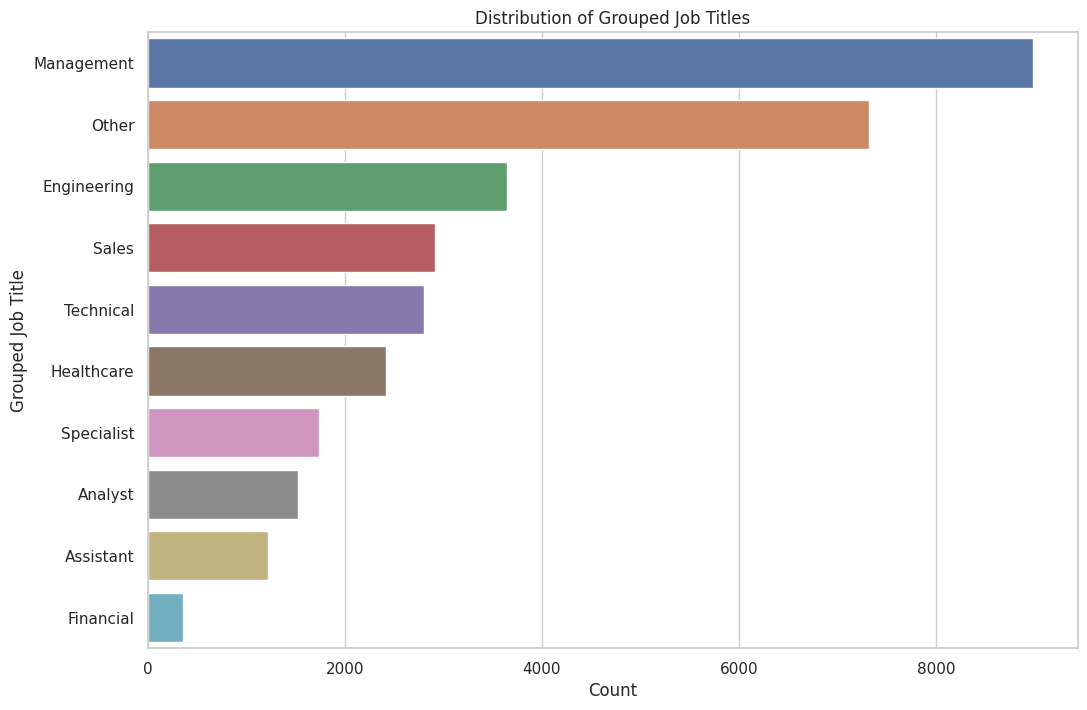

In [27]:

# Define a mapping for grouping categories
category_mapping = {
    'Management': 'Management',
    'Engineering': 'Engineering',
    'I': 'Other',
    'Nursing': 'Healthcare',
    'Sales': 'Sales',
    'Specialist': 'Specialist',
    'Analyst': 'Analyst',
    'Technician': 'Technical',
    'Assistant': 'Assistant',
    'Reduced_Other': 'Other',
    'Director': 'Management',
    'To': 'Other',
    'Other': 'Other',
    'Coordinator': 'Management',
    'Representative': 'Sales',
    'Developer': 'Technical',
    'Supervisor': 'Management',
    'Lead': 'Management',
    'Consultant': 'Management',
    'Architect': 'Engineering',
    'Senior': 'Other',
    'Slash': 'Other',
    'Accounting': 'Financial',
    'Technical': 'Technical',
    'Designer': 'Creative',
    'Administrator': 'Management',
    'Operator': 'Technical',
    'Executive': 'Management',
    'Driver': 'Other',
    'Part': 'Other',
    'Research': 'Other',
    'Service': 'Other',
    'Technologist': 'Technical',
    'Health': 'Healthcare',
    'Support': 'Other',
    'Care': 'Healthcare',
    'Staff': 'Other',
    'Team': 'Management',
    'Business': 'Other',
    'Data': 'Technical',
    'Remote': 'Other',
    'Job': 'Other',
    'Operations': 'Management',
    'Travel': 'Other',
    'Center': 'Management',
    '2024': 'Other',
    'Tax': 'Financial',
    'Make': 'Other',
    'Development': 'Other',
    'Full': 'Other',
    'Pipe': 'Other'
}
# Map the categories using the defined mapping
df['Grouped_Category'] = df['Recategorized_Job_Title'].map(category_mapping)
# Check the unique values in the new column
print(df['Grouped_Category'].unique())
# Print the count values of grouped categories
grouped_category_counts = df['Grouped_Category'].value_counts()
print(grouped_category_counts)
# Set the plot style
sns.set(style="whitegrid")
# Plot a bar chart for the grouped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Grouped_Category', data=df, order=df['Grouped_Category']
              .value_counts().index[:10])
#sns.countplot(y='Location', data=df, order=df['Location'].value_counts())
#axes[0].set_title('Top 10 Locations with Most Job Listings')
plt.title('Distribution of Grouped Job Titles')
plt.xlabel('Count')
plt.ylabel('Grouped Job Title')
plt.show()



In [28]:
# Print the count values of all categories
category_counts_recategorized = df['Grouped_Category'].value_counts()
print(category_counts_recategorized)


Management     8983
Other          7322
Engineering    3649
Sales          2911
Technical      2802
Healthcare     2414
Specialist     1740
Analyst        1528
Assistant      1223
Financial       360
Creative        314
Name: Grouped_Category, dtype: int64


## **RECATEGORISER LA VARIABLE DE LOCALISATION**

In [29]:
#job title has many unique values; lets visualize them
df.Location.unique()


array(['Little River, SC', 'Beaver Dam, WI', 'Bessemer, AL', ...,
       'Brunswick, TN', 'South Boston, VA', 'Placerville, CA'],
      dtype=object)

In [30]:
# Define a function to categorize locations into broader regions based on state codes
def categorize_location(location):
    state_code = location.split(",")[-1].strip() # Extract the state code
    # Define mappings of state codes to broader regions
    region_mapping = {
        'AL': 'South',
        'AK': 'West',
        'AZ': 'West',
        'AR': 'South',
        'CA': 'West',
        'CO': 'West',
        'CT': 'East',
        'DE': 'East',
        'FL': 'South',
        'GA': 'South',
        'HI': 'West',
        'ID': 'West',
        'IL': 'Central',
        'IN': 'Central',
        'IA': 'Central',
        'KS': 'Central',
        'KY': 'South',
        'LA': 'South',
        'ME': 'North',
        'MD': 'East',
        'MA': 'East',
        'MI': 'Central',
        'MN': 'North',
        'MS': 'South',
        'MO': 'Central',
        'MT': 'West',
        'NE': 'Central',
        'NV': 'West',
        'NH': 'North',
        'NJ': 'East',
        'NM': 'West',
        'NY': 'East',
        'NC': 'South',
        'ND': 'North',
        'OH': 'Central',
        'OK': 'Central',
        'OR': 'West',
        'PA': 'East',
        'RI': 'East',
        'SC': 'South',
        'SD': 'North',
        'TN': 'South',
        'TX': 'South',
        'UT': 'West',
        'VT': 'North',
        'VA': 'East',
        'WA': 'West',
        'WV': 'South',
        'WI': 'Central',
        'WY': 'West',
    }
    # Use the mapping or assign to 'Other' if not found
    return region_mapping.get(state_code, 'Other')

# Apply the function to create a new column with categorized locations
df['Categorized_Location'] = df['Location'].apply(categorize_location)
# Check the unique values in the new column
print(df['Categorized_Location'].unique())


['South' 'Central' 'West' 'Other' 'East' 'North']


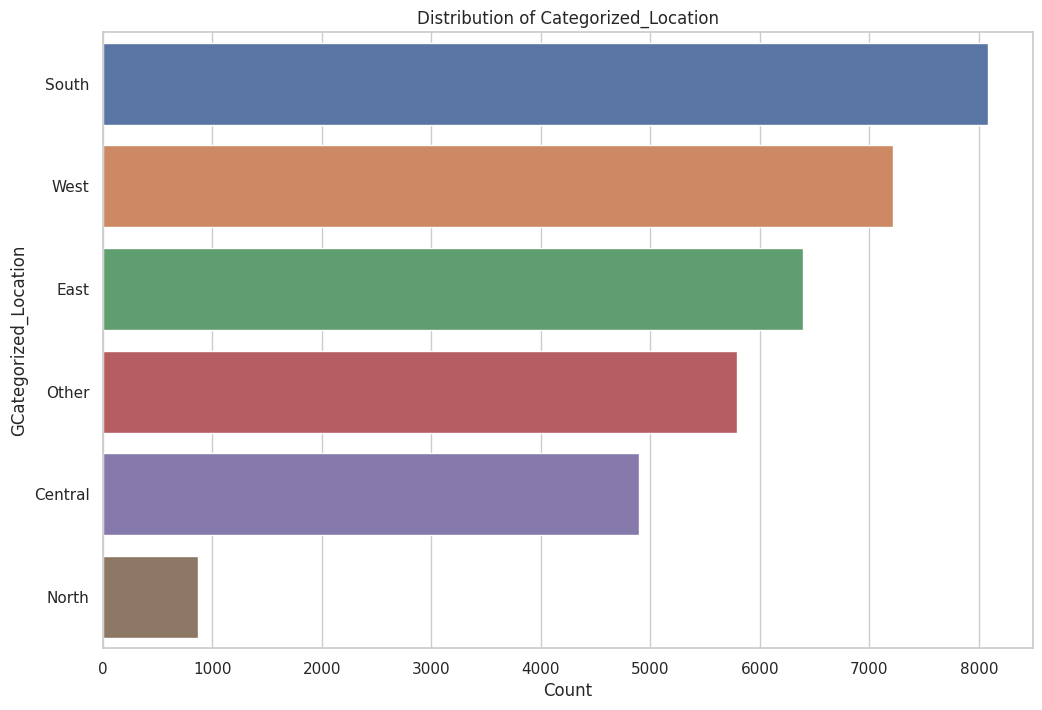

In [38]:
# Set the plot style
sns.set(style="whitegrid")
# Plot a bar chart for the grouped categories
plt.figure(figsize=(12, 8))
sns.countplot(y='Categorized_Location', data=df,
              order=df['Categorized_Location'].value_counts().index[:10])
plt.title('Distribution of Categorized_Location')
plt.xlabel('Count')
plt.ylabel('GCategorized_Location')
plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company_Name             33242 non-null  object 
 1   Company_Page_Listed      33246 non-null  bool   
 2   Employee_Count           33246 non-null  int64  
 3   Followers_Count          33246 non-null  int64  
 4   Job_Title                33246 non-null  object 
 5   Job_Description          33244 non-null  object 
 6   Is_Supervisor            33246 non-null  bool   
 7   Max_Salary               33246 non-null  float64
 8   Median_Salary            33246 non-null  float64
 9   Min_Salary               33246 non-null  float64
 10  Posting_Period           33246 non-null  object 
 11  Posting_Listed           33246 non-null  bool   
 12  Work_Type                33246 non-null  object 
 13  Location                 33246 non-null  object 
 14  State_Code            

In [43]:
# Drop specified columns
df =df.drop(columns =['Job_Title','Job_Description','Categorized_Job_Title','Recategorized_Job_Title'
         ,'Location','State_Code','Domain'])
# Check the updated DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company_Name            33242 non-null  object 
 1   Company_Page_Listed     33246 non-null  bool   
 2   Employee_Count          33246 non-null  int64  
 3   Followers_Count         33246 non-null  int64  
 4   Is_Supervisor           33246 non-null  bool   
 5   Max_Salary              33246 non-null  float64
 6   Median_Salary           33246 non-null  float64
 7   Min_Salary              33246 non-null  float64
 8   Posting_Period          33246 non-null  object 
 9   Posting_Listed          33246 non-null  bool   
 10  Work_Type               33246 non-null  object 
 11  Is_Remote               33246 non-null  int64  
 12  Views                   33246 non-null  int64  
 13  Application_Type        33246 non-null  object 
 14  Application_Is_Offsite  33246 non-null

In [44]:
df.head()

,Company_Name,Company_Page_Listed,Employee_Count,Followers_Count,Is_Supervisor,Max_Salary,Median_Salary,Min_Salary,Posting_Period,Posting_Listed,...,Is_Remote,Views,Application_Type,Application_Is_Offsite,Experience_Level,Has_Posting_Domain,Is_Sponsored,Base_Compensation,Grouped_Category,Categorized_Location
0,HearingLife,True,1171,11417,False,5250.00,5250.00,5250.00,MONTHLY,True,...,0,9,OffsiteApply,True,Entry level,True,0,1,Healthcare,South
1,"Metalcraft of Mayville, Inc.",True,300,2923,False,0.00,0.00,0.00,Not Listed,False,...,0,0,OffsiteApply,True,Not Listed,True,0,0,Sales,Central
2,"U.S. Tsubaki Power Transmission, LLC",True,314,8487,True,0.00,0.00,0.00,Not Listed,False,...,0,0,OffsiteApply,True,Not Listed,True,0,0,Engineering,South
3,Episcopal Communities & Services,True,36,305,False,22.27,22.27,22.27,HOURLY,True,...,0,1,OffsiteApply,True,Entry level,True,0,1,Other,West
4,"iHerb, LLC",True,1227,51933,False,275834.00,240895.00,205956.00,YEARLY,True,...,1,0,OffsiteApply,True,Mid-Senior level,True,0,1,Engineering,Other


In [45]:
#check the NA counts
df.isna().sum()


Company_Name              4
Company_Page_Listed       0
Employee_Count            0
Followers_Count           0
Is_Supervisor             0
Max_Salary                0
Median_Salary             0
Min_Salary                0
Posting_Period            0
Posting_Listed            0
Work_Type                 0
Is_Remote                 0
Views                     0
Application_Type          0
Application_Is_Offsite    0
Experience_Level          0
Has_Posting_Domain        0
Is_Sponsored              0
Base_Compensation         0
Grouped_Category          0
Categorized_Location      0
dtype: int64

In [46]:
# Drop rows with null values
df.dropna(inplace=True)


In [47]:
#check duplicate values
df.duplicated().sum()

1782

In [48]:
#drop the duplicated values
df = df.drop_duplicates()


In [49]:
df.shape

(31460, 21)

In [50]:
column_names = df.columns.tolist()
print("Column Names:")
print(column_names)


Column Names:
['Company_Name', 'Company_Page_Listed', 'Employee_Count', 'Followers_Count', 'Is_Supervisor', 'Max_Salary', 'Median_Salary', 'Min_Salary', 'Posting_Period', 'Posting_Listed', 'Work_Type', 'Is_Remote', 'Views', 'Application_Type', 'Application_Is_Offsite', 'Experience_Level', 'Has_Posting_Domain', 'Is_Sponsored', 'Base_Compensation', 'Grouped_Category', 'Categorized_Location']


## **La visualisation des données**

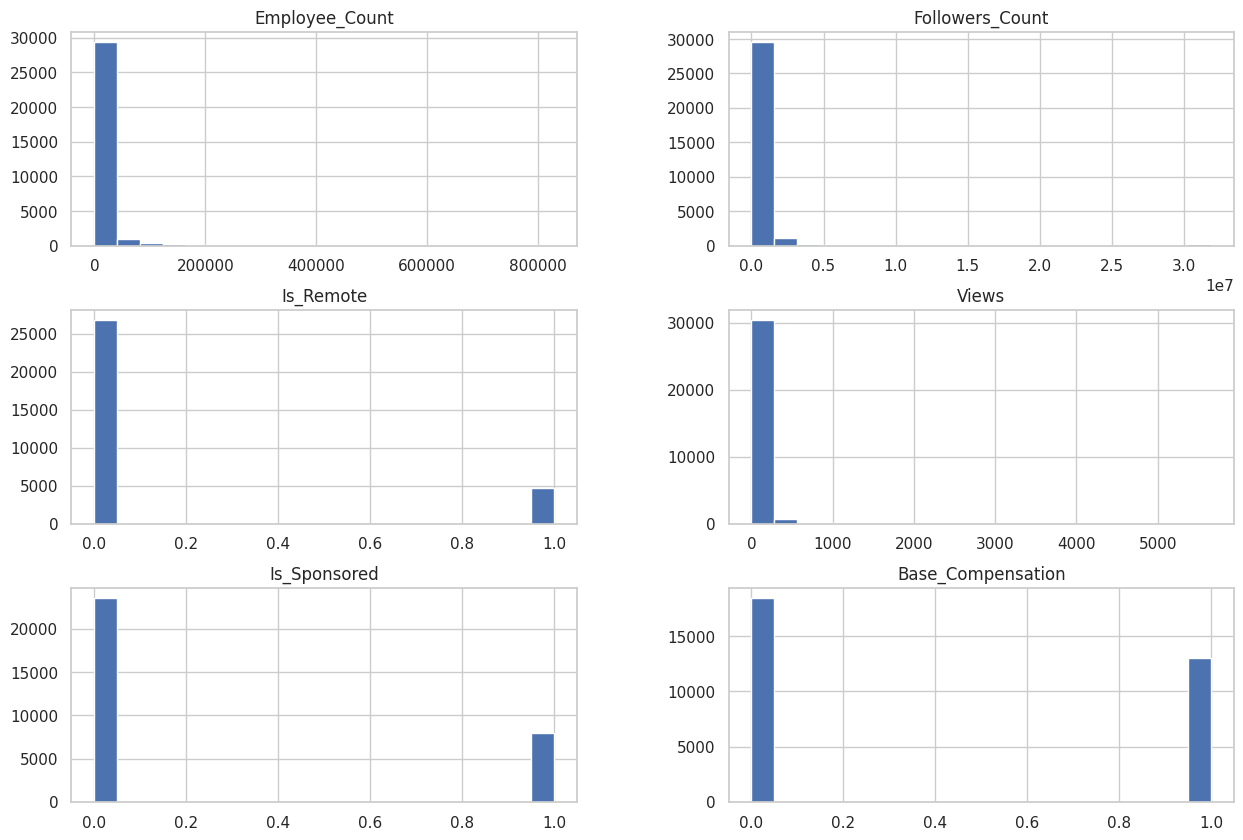

In [51]:
numeric_columns = df.select_dtypes(include=['int64'])
numeric_columns.hist(bins=20, figsize=(15, 10))
plt.show()

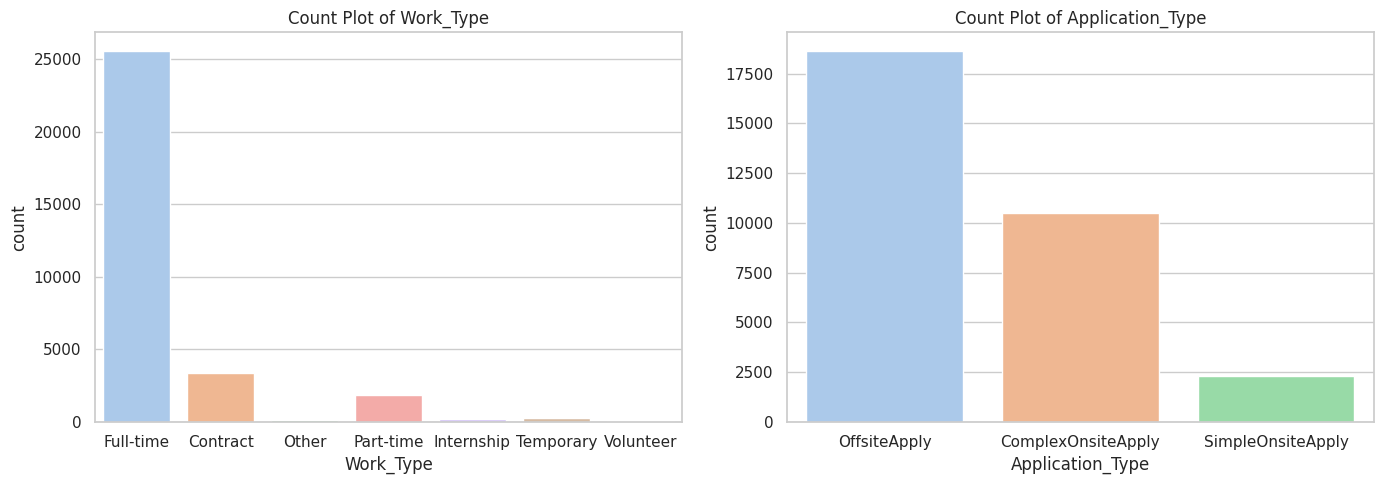

In [52]:
# Graphique de comptage combiné côte à côte pour les variables catégorielles
categorical_columns = ['Work_Type','Application_Type']
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(14, 5))
for i, col in enumerate(categorical_columns):
 sns.countplot(x=col, data=df, ax=axes[i], palette='pastel')
 axes[i].set_title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()


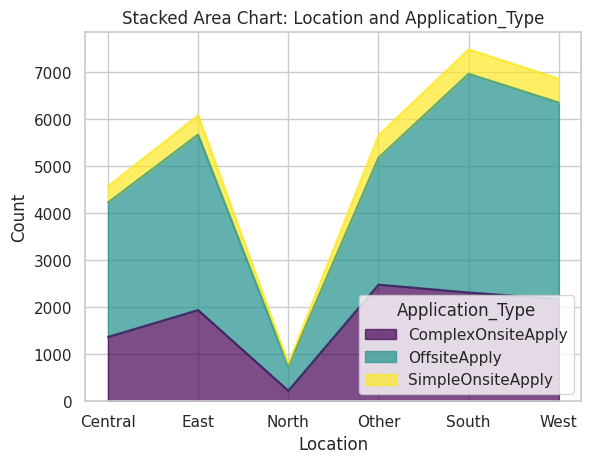

In [53]:

# Graphique à surface empilées.
crosstab = pd.crosstab(df['Categorized_Location'],df['Application_Type'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Location and Application_Type')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


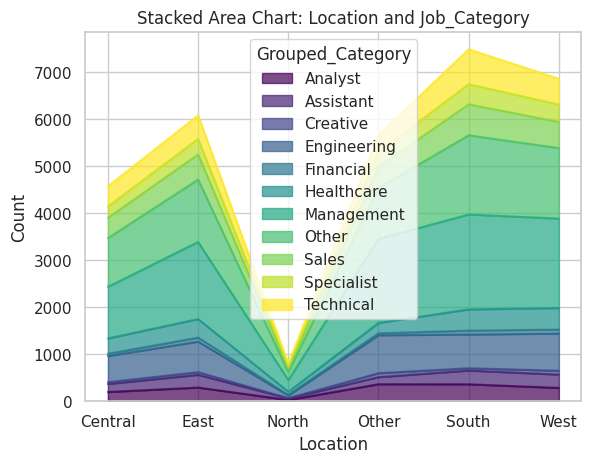

In [54]:
#Stacked Area Chart .
crosstab = pd.crosstab(df['Categorized_Location'],df['Grouped_Category'])
crosstab.plot(kind='area', colormap='viridis', alpha=0.7, stacked=True)
plt.title('Stacked Area Chart: Location and Job_Category')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()


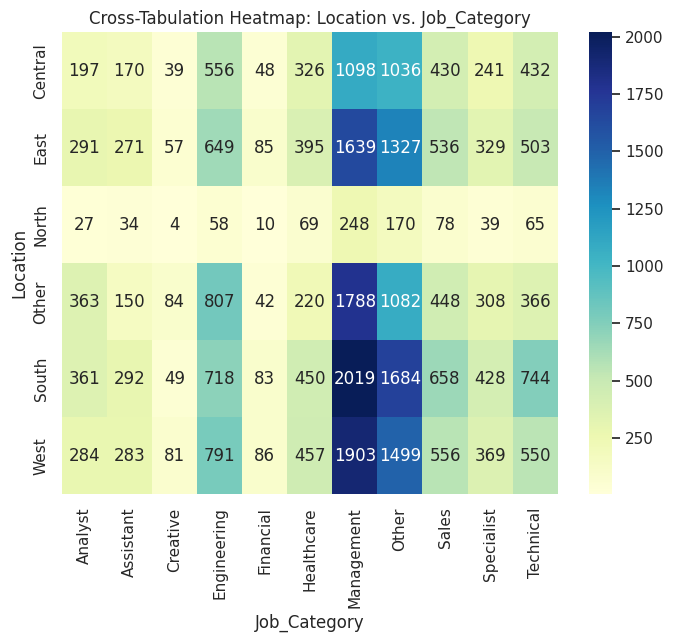

In [55]:
crosstab = pd.crosstab(df['Categorized_Location'], df['Grouped_Category'])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Cross-Tabulation Heatmap: Location vs. Job_Category')
plt.xlabel('Job_Category')
plt.ylabel('Location')
plt.show()


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
# Selecting variables for pairplot
selected_vars = ['Employee_Count', 'Followers_Count', 'Max_Salary',
                 'Median_Salary', 'Min_Salary','Views']
# Creating a DataFrame with selected variables
pairplot_data = df[selected_vars]
# Dropping null values (if any)
pairplot_data = pairplot_data.dropna()
# Create a pairplot
sns.set(style="ticks")
#sns.pairplot(pairplot_data, hue='Grouped_Category', palette='husl', markers= ["o", "s", "D"])
# Show the plot
plt.show()


In [64]:
from sklearn.preprocessing import LabelEncoder
# Convert boolean columns to integer
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)
# Encode categorical columns
le = LabelEncoder()
categorical_columns = df.select_dtypes(include='object').columns


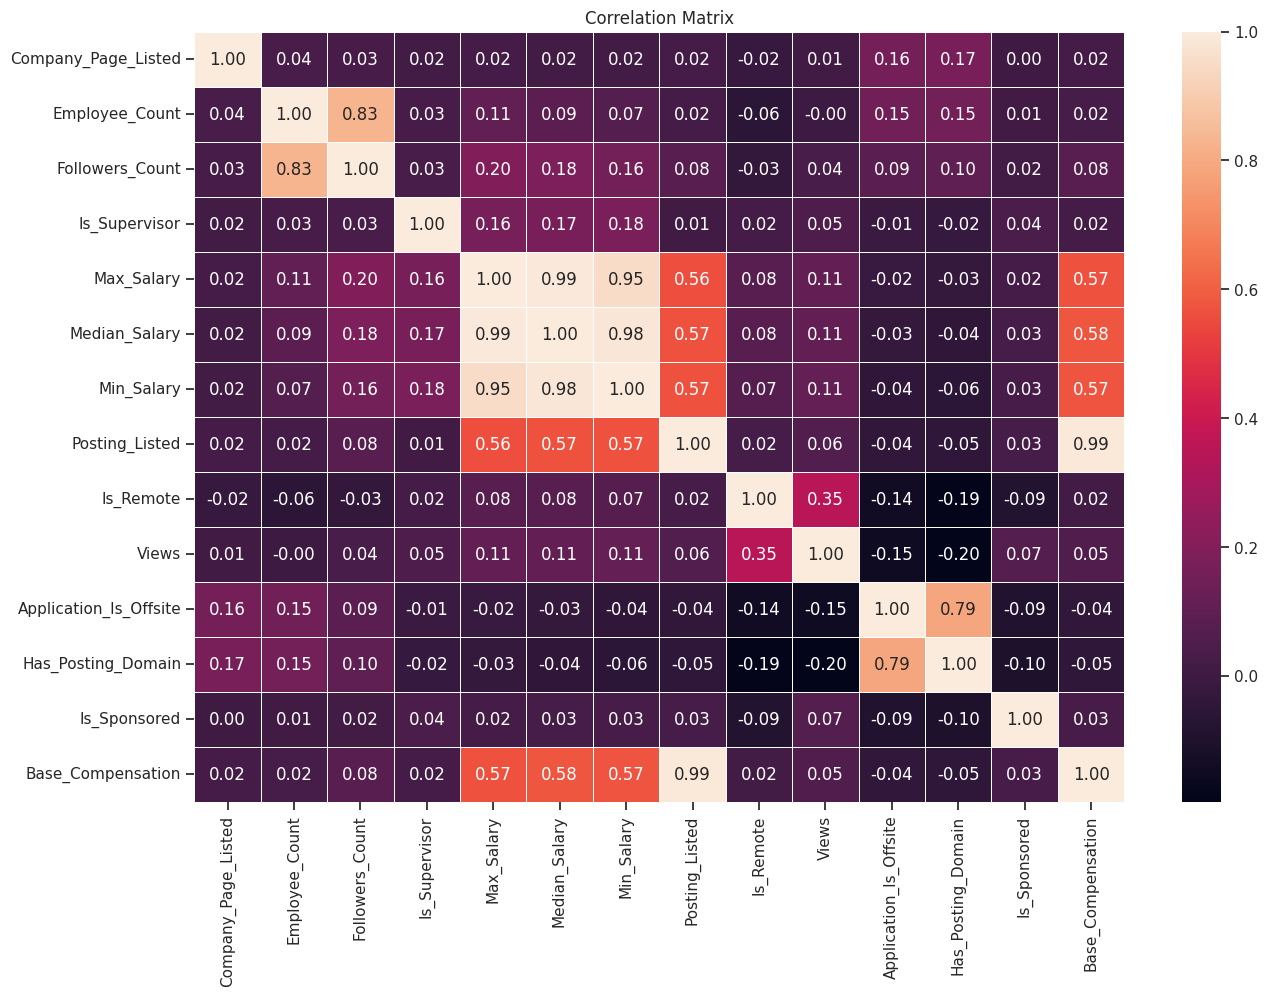

In [65]:
# Create a correlation matrix
correlation_matrix = df.corr()
# Plot the correlation matrix using Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()



## **TARGET_VARIABLE : VÉRIFIER LE PARRAINAGE (le sponsorship)**

In [67]:
# Define the target variable
target_variable = 'Is_Sponsored'
# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)


Is_Sponsored              1.000000
Views                     0.067507
Is_Supervisor             0.040830
Min_Salary                0.032904
Base_Compensation         0.030727
Posting_Listed            0.026193
Median_Salary             0.025638
Max_Salary                0.019885
Followers_Count           0.017316
Employee_Count            0.012564
Company_Page_Listed       0.002716
Is_Remote                -0.088057
Application_Is_Offsite   -0.089033
Has_Posting_Domain       -0.104598
Name: Is_Sponsored, dtype: float64


In [68]:
# List of columns to drop
columns_to_drop = [
    'Company_Page_Listed',
    'Grouped_Category',
    'Work_Type',
    'Company_Name',
    'Categorized_Location',
    'Experience_Level',
    'Application_Type',
    'Is_Remote',
    'Application_Is_Offsite',
    'Has_Posting_Domain'
]
# Create the new DataFrame df_train by dropping specified columns
df_train = df.drop(columns=columns_to_drop)
# Display the updated DataFrame info
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31460 entries, 0 to 33243
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Count     31460 non-null  int64  
 1   Followers_Count    31460 non-null  int64  
 2   Is_Supervisor      31460 non-null  int64  
 3   Max_Salary         31460 non-null  float64
 4   Median_Salary      31460 non-null  float64
 5   Min_Salary         31460 non-null  float64
 6   Posting_Period     31460 non-null  object 
 7   Posting_Listed     31460 non-null  int64  
 8   Views              31460 non-null  int64  
 9   Is_Sponsored       31460 non-null  int64  
 10  Base_Compensation  31460 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 2.9+ MB


## **AJUSTEMENT DU MODÈLE ET PRÉDICTION**


In [70]:
# Split the data into training and testing sets
X = df_train.drop('Is_Sponsored', axis=1)
y = df_train['Is_Sponsored']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)
# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (25168, 10)
X_test shape: (6292, 10)
y_train shape: (25168,)
y_test shape: (6292,)


## **Vérifier le déséquilibre des classes**

In [77]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Check class distribution
class_distribution = y_train.value_counts()
print("Class Distribution:")
print(class_distribution)
# Check the imbalance ratio (ratio of the majority class to the minority class)
imbalance_ratio = class_distribution[0] / class_distribution[1]
print("Imbalance Ratio:", imbalance_ratio)
# If the imbalance ratio is greater than a threshold (e.g., 2), apply SMOTE
threshold = 2

if imbalance_ratio > threshold:
    # Initialize SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)

    # Fit and apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    # Check the class distribution after SMOTE
    resampled_class_distribution = y_train_resampled.value_counts()
    print("\nClass Distribution After SMOTE:")
    print(resampled_class_distribution)
    # Update the training data with the resampled data
    X_train = X_train_resampled
    y_train = y_train_resampled
    print("\nSMOTE Applied. Training data resampled.")
else:
    print("\nNo significant class imbalance. SMOTE not applied.")



Class Distribution:
0    18828
1     6340
Name: Is_Sponsored, dtype: int64
Imbalance Ratio: 2.9697160883280755


ValueError: ignored

In [74]:
# Define the columns to remove outliers
selected_columns = ['Employee_Count','Followers_Count','Is_Supervisor','Max_Salary','M
                    'Posting_Period','Posting_Listed','Base_Compensation']
# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1
# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5
# CreatING a mask for outliers in the selected columns
outlier_mask = (
    (X_train[selected_columns] < (Q1 - threshold * IQR)) |
    (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)
# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]
# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")


SyntaxError: ignored

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)
# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)
# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))


In [ ]:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())
# Define the parameter grid for GridSearchCV
param_grid = {
 'kneighborsclassifier__n_neighbors': [3, 5, 7],
 'kneighborsclassifier__weights': ['uniform', 'distance'],
}
# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

In [ ]:
# Best Parameters for Decision Tree Classifier
best_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split':0}
# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                        max_depth=best_params['max_depth'],
                                        min_samples_leaf=best_params['min_samples_leaf'],
                                        min_samples_split=best_params['min_samples_split'],
                                        random_state=0)
dt_classifier.fit(X_train_clean, y_train_clean)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)




In [ ]:
# Create and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimato
rf_classifier.fit(X_train_clean, y_train_clean)
# Predict on the test set
y_pred = rf_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)


In [ ]:
# Create and train the XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42,max_features='sqrt', n_estimators=100,
xgb_classifier.fit(X_train_clean, y_train_clean)
# Predict on the test set
y_pred = xgb_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("XGBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)

In [ ]:
# Create the CatBoost Classifier
catboost_classifier = CatBoostClassifier(random_seed=42, logging_level='Silent', learn
catboost_classifier.fit(X_train_clean, y_train_clean)
# Predict on the test set
y_pred = catboost_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("CatBoost Model Accuracy:", accuracy)
print("Classification Report:\n", report)


In [ ]:
# Create the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42, verbose=0, learning_rate=0
gb_classifier.fit(X_train_clean, y_train_clean)
# Predict on the test set
y_pred = gb_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Gradient Boosting Model Accuracy:", accuracy)
print("Classification Report:\n", report)

In [ ]:
# Create the LightGBM Classifier
lgb_classifier = LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train_clean, y_train_clean)
# Predict on the test set
y_pred = lgb_classifier.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("LightGBM Model Accuracy:", accuracy)
print("Classification Report:\n", report)


In [ ]:
# Define a list of classifiers and their names excluding Linear Regression
classifiers = [logistic_model, best_estimator, dt_classifier, rf_classifier, xgb_class
classifier_names = ["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "X
# Create a function to plot ROC curve and calculate AUC
def plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test):
    plt.figure(figsize=(12, 8))
    for classifier, name in zip(classifiers, classifier_names):
        if hasattr(classifier, 'predict_proba'): # Check if the classifier has predi
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        else:
            try:
                y_pred_prob = classifier.decision_function(X_test)
            except AttributeError:
                raise AttributeError(f"{name} does not have predict_proba or decision_
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        auc = roc_auc_score(y_test, y_pred_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
# Plot ROC curves and calculate AUC for classifiers excluding Linear Regression
plot_roc_curve_and_auc(classifiers, classifier_names, X_test, y_test)


In [ ]:
# Define the target variable
target_variable = 'Median_Salary'
# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)


In [ ]:
# Drop columns related to Max_Salary and Min_Salary
df.drop(['Max_Salary', 'Min_Salary'], axis=1, inplace=True)
# Define the target variable
target_variable = 'Median_Salary'
# Display features and their correlation with the target variable
correlation_with_target = df.corr()[target_variable].sort_values(ascending=False)
print(correlation_with_target)

In [ ]:
# Selecting important columns
selected_columns = [
    'Median_Salary',
    'Posting_Period',
    'Base_Compensation',
    'Posting_Listed',
    'Followers_Count',
    'Is_Supervisor',
    'Views',
    'Employee_Count',
    'Is_Remote',
    'Categorized_Location',
    'Experience_Level',
    'Is_Sponsored',
    'Company_Page_Listed'

]
# Create a new dataframe with the selected columns
df_salary = df[selected_columns]



In [ ]:
df_salary.head()


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_salary2 = df_salary
# Calculate the median of the "Median_Salary" feature
median_salary_threshold = df_salary2['Median_Salary'].median()
# Create a new binary classification target variable
df_salary2['Salary_Class'] = (df_salary2['Median_Salary'] > median_salary_threshold).a
# Drop the original "Median_Salary" column
df_salary2 = df_salary2.drop('Median_Salary', axis=1)
# Label encode the 'Salary_Class' column
label_encoder = LabelEncoder()
df_salary2['Salary_Class'] = label_encoder.fit_transform(df_salary2['Salary_Class'])

In [ ]:
print(df_salary2['Salary_Class'].value_counts())


In [ ]:
# Split the data into training and testing sets
X = df_salary2.drop('Salary_Class', axis=1)
y = df_salary2['Salary_Class']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42
# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np
# Check class distribution
class_distribution = y_train.value_counts()
print("Class Distribution:")
print(class_distribution)
# Check the imbalance ratio (ratio of the majority class to the minority class)
imbalance_ratio = class_distribution[0] / class_distribution[1]
print("Imbalance Ratio:", imbalance_ratio)

# If the imbalance ratio is greater than a threshold (e.g., 2), apply SMOTE
threshold = 2
if imbalance_ratio > threshold:
    # Initialize SMOTE
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    # Fit and apply SMOTE to the training data
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    # Check the class distribution after SMOTE
    resampled_class_distribution = y_train_resampled.value_counts()
    print("\nClass Distribution After SMOTE:")
    print(resampled_class_distribution)
    # Update the training data with the resampled data
    X_train = X_train_resampled
    y_train = y_train_resampled
    print("\nSMOTE Applied. Training data resampled.")
else:
    print("\nNo significant class imbalance. SMOTE not applied.")

In [ ]:
:
# Define the columns to remove outliers
selected_columns = [
    'Posting_Period',
    'Base_Compensation',
    'Posting_Listed',
    'Followers_Count',
    'Is_Supervisor',
    'Views',
    'Employee_Count',
    'Is_Remote',
    'Categorized_Location',
    'Experience_Level',
    'Is_Sponsored',
    'Company_Page_Listed'

]

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1
# SetTING a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5
# CreatING a mask for outliers in the selected columns
outlier_mask = (
 (X_train[selected_columns] < (Q1 - threshold * IQR)) |
 (X_train[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)
# Remove rows with outliers from X_train and y_train
X_train_clean = X_train[~outlier_mask]
y_train_clean = y_train[~outlier_mask]
# Print the number of rows removed
num_rows_removed = len(X_train) - len(X_train_clean)
print(f"Number of rows removed due to outliers: {num_rows_removed}")



In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_clean, y_train_clean)
# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, lr_predictions)
mae = mean_absolute_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse:.2f}")
print(f"Linear Regression Mean Absolute Error: {mae:.2f}")


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_clean, y_train_clean)
# Make predictions on the test set
logistic_predictions = logistic_model.predict(X_test)
# Calculate AUC
logistic_auc = roc_auc_score(y_test, logistic_predictions)
# Generate ROC curve
fpr, tpr, _ = roc_curve(y_test, logistic_predictions)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, logistic_predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

In [ ]:
:
# Create a pipeline with the KNN classifier
knn_pipeline = make_pipeline(KNeighborsClassifier())
# Define the parameter grid for GridSearchCV
param_grid = {
 'kneighborsclassifier__n_neighbors': [3, 5, 7],
 'kneighborsclassifier__weights': ['uniform', 'distance'],
}
# Create the GridSearchCV object
grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='accuracy')
# Fit the model to the training data
grid_search.fit(X_train_clean, y_train_clean)
# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)
# Predict on the test set using the best estimator
y_pred = best_estimator.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", report)

In [ ]:
# Best Parameters for Decision Tree Classifier
best_params = {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split':0}
# Create and train the Decision Tree Classifier with the specified parameters
dt_classifier = DecisionTreeClassifier(criterion=best_params['criterion'],
                                        max_depth=best_params['max_depth'],
                                        min_samples_leaf=best_params['min_samples_leaf'],
                                        min_samples_split=best_params['min_samples_split'],
                                        random_state=0)
dt_classifier.fit(X_train_clean, y_train_clean)
# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)
# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Model Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt

In [ ]:
df_salary.shape

In [ ]:
from scipy import stats
# Calculate Z-scores for each column
z_scores = stats.zscore(df_salary)
# Define a threshold for Z-scores (here: 3 standard deviations)
threshold = 3
outliers = (abs(z_scores) > threshold).all(axis=1)
# Remove outliers from the dataset
df_no_outliers = df[~outliers]
# Verify the shape of the new dataset
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_no_outliers.shape)

In [ ]:
# 'ChemicalCount' is the target variable
X = df_salary.drop('Median_Salary', axis=1) # Features
y = df_salary['Median_Salary'] # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=
# Print the shapes of the new splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
from sklearn.metrics import mean_absolute_error
# Calculate the baseline MAE using the mean of the target variable
baseline_mae_mean = mean_absolute_error(df_salary['Median_Salary'], np.full_like(df_sa
#Alternatively, you can use median as the baseline
baseline_mae_median = mean_absolute_error(df_salary['Median_Salary'], np.full_like(df_
print(f'Baseline MAE_mean: {baseline_mae_mean:.6f}')
print(f'Baseline MAE_median: {baseline_mae_median:.6f}')


In [ ]:
from sklearn.metrics import mean_squared_error
# Calculate the baseline RMSE using the mean of the target variable
baseline_rmse_mean = np.sqrt(mean_squared_error(df_salary['Median_Salary'], np.full_li
# Alternatively, you can use median as the baseline
baseline_rmse_median = np.sqrt(mean_squared_error(df_salary['Median_Salary'], np.full_
print(f'Baseline RMSE_mean: {baseline_rmse_mean:.6f}')
print(f'Baseline RMSE_median: {baseline_rmse_median:.6f}')

In [ ]:
from sklearn.metrics import r2_score
# Calculate the baseline R-squared using the mean of the target variable
baseline_r2 = r2_score(y_test, np.full_like(y_test, y_test.mean()))
print(f'Baseline R-squared: {baseline_r2:.4f}')


In [ ]:
def evaluate_regression_model(model, X_train, X_test, y_train, y_test):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Evaluate the model's performance
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Return the evaluation metrics
    return {'Mean Squared Error': mse, 'Mean Absolute Error': mae, 'R-squared': r2}

# Initialize models
lr_model = LinearRegression()
lasso_model = Lasso(alpha=1.0)
ridge_model = Ridge(alpha=1.0)
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)
# Evaluate models
lr_metrics = evaluate_regression_model(lr_model, X_train, X_test, y_train, y_test)
lasso_metrics = evaluate_regression_model(lasso_model, X_train, X_test, y_train, y_tes
ridge_metrics = evaluate_regression_model(ridge_model, X_train, X_test, y_train, y_tes
elasticnet_metrics = evaluate_regression_model(elasticnet_model, X_train, X_test, y_tr
# Print the results
print("Linear Regression Metrics:", lr_metrics)
print("Lasso Regression Metrics:", lasso_metrics)
print("Ridge Regression Metrics:", ridge_metrics)
print("Elastic Net Metrics:", elasticnet_metrics)


In [ ]:
# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# Initialize Lasso Regression model
lasso_model = Lasso()
# Initialize GridSearchCV
lasso_grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squa
lasso_grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_lasso_params = lasso_grid_search.best_params_
# Initialize Lasso model with best hyperparameters
best_lasso_model = Lasso(alpha=best_lasso_params['alpha'])


In [ ]:
# Fit the Lasso model with the best hyperparameters
best_lasso_model.fit(X_train, y_train)
# Perform k-fold cross-validation
lasso_cv_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5, scoring='n
lasso_rmse_scores = np.sqrt(-lasso_cv_scores)
# Print the metrics
print("Lasso Regression Cross-Validation RMSE Scores:", lasso_rmse_scores)
print("Mean RMSE:", lasso_rmse_scores.mean())
y_pred = best_lasso_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R-squared:", r2_score(y_test, y_pred))


In [ ]:
# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
# Initialize Ridge Regression model
ridge_model = Ridge()
# Initialize GridSearchCV
ridge_grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squa
ridge_grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_ridge_params = ridge_grid_search.best_params_
# Initialize Ridge model with best hyperparameters
best_ridge_model = Ridge(alpha=best_ridge_params['alpha'])


In [ ]:
# Fit the Ridge model with the best hyperparameters
best_ridge_model.fit(X_train, y_train)
# Perform k-fold cross-validation
ridge_cv_scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5, scoring='n
ridge_rmse_scores = np.sqrt(-ridge_cv_scores)
# Print the metrics
print("Ridge Regression Cross-Validation RMSE Scores:", ridge_rmse_scores)
print("Mean RMSE:", ridge_rmse_scores.mean())
y_pred = best_ridge_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R-squared:", r2_score(y_test, y_pred))

In [ ]:
# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.3, 0.5, 0.7
# Initialize Elastic Net model
elasticnet_model = ElasticNet()
# Initialize GridSearchCV
elasticnet_grid_search = GridSearchCV(elasticnet_model, param_grid, cv=5, scoring='neg
elasticnet_grid_search.fit(X_train, y_train)
# Get the best hyperparameters
best_elasticnet_params = elasticnet_grid_search.best_params_
# Initialize Elastic Net model with best hyperparameters
best_elasticnet_model = ElasticNet(alpha=best_elasticnet_params['alpha'], l1_ratio=bes

In [ ]:
# Fit the Elastic Net model with the best hyperparameters
best_elasticnet_model.fit(X_train, y_train)
# Perform k-fold cross-validation
elasticnet_cv_scores = cross_val_score(best_elasticnet_model, X_train, y_train, cv=5,
elasticnet_rmse_scores = np.sqrt(-elasticnet_cv_scores)
# Print the metrics
print("Elasticnet Regression Cross-Validation RMSE Scores:", elasticnet_rmse_scores)
print("Mean RMSE:", elasticnet_rmse_scores.mean())
y_pred = best_elasticnet_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test R-squared:", r2_score(y_test, y_pred))


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_split= 5)
# Fit the model to the training data
rf_model.fit(X_train, y_train)
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)
# Perform k-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squ
rf_rmse_scores = np.sqrt(-rf_cv_scores)
# Print the metrics
print("Random Forest Regression Cross-Validation RMSE Scores:", rf_rmse_scores)
print("Mean RMSE:", rf_rmse_scores.mean())
y_pred_rf = rf_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test R-squared:", r2_score(y_test, y_pred_rf))


In [ ]:
from lightgbm import LGBMRegressor
# Initialize LGBM model
lgbm_model = LGBMRegressor(n_estimators=200, max_depth=50, learning_rate= 0.1)
# Fit the model to the training data
lgbm_model.fit(X_train, y_train)
# Make predictions on the test set
lgbm_predictions = lgbm_model.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, rf_predictions)
mae = mean_absolute_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)
# Perform k-fold cross-validation
lgbm_cv_scores = cross_val_score(lgbm_model, X_train, y_train, cv=5, scoring='neg_mean
lgbm_rmse_scores = np.sqrt(-lgbm_cv_scores)
# Print the metrics
print("LGBM Regression Cross-Validation RMSE Scores:", lgbm_rmse_scores)
print("Mean RMSE:", lgbm_rmse_scores.mean())
y_pred_lgbm = lgbm_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgbm)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_lgbm))
print("Test R-squared:", r2_score(y_test, y_pred_lgbm))


In [ ]:
from catboost import CatBoostRegressor
# Define the parameter grid
#param_grid_catboost = {'iterations': [50, 100, 200], 'depth': [4, 6, 8], 'learning_ra
# Initialize CatBoost model
catboost_model = CatBoostRegressor(iterations=100,depth = 8 , learning_rate = 0.1)
# Fit the model with the best hyperparameters
catboost_model.fit(X_train, y_train)
# Perform k-fold cross-validation
catboost_cv_scores = cross_val_score(catboost_model, X_train, y_train, cv=5, scoring='
catboost_rmse_scores = np.sqrt(-catboost_cv_scores)
# Print the metrics
print("CatBoost Regression Cross-Validation RMSE Scores:", catboost_rmse_scores)
print("Mean RMSE:", catboost_rmse_scores.mean())
y_pred_catboost = catboost_model.predict(X_test)
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_catboost)))
print("Test MAE:", mean_absolute_error(y_test, y_pred_catboost))
print("Test R-squared:", r2_score(y_test, y_pred_catboost))


In [ ]:
# Define predictions for each model
lr_predictions = lr_model.predict(X_test)
lasso_predictions = best_lasso_model.predict(X_test)
ridge_predictions = best_ridge_model.predict(X_test)
elasticnet_predictions = best_elasticnet_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
lgbm_predictions = lgbm_model.predict(X_test)
catboost_predictions = catboost_model.predict(X_test)

# Create a DataFrame with the metrics for each model
data = {
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'Elastic Ne
    'Mean RMSE': [lr_metrics['Mean Squared Error'], lasso_metrics['Mean Squared Error'
    elasticnet_metrics['Mean Squared Error'], rf_rmse_scores.mean(), lgb
    'Test RMSE': [np.sqrt(mean_squared_error(y_test, lr_predictions)), np.sqrt(mean_sq
    np.sqrt(mean_squared_error(y_test, ridge_predictions)), np.sqrt(mean
    np.sqrt(mean_squared_error(y_test, rf_predictions)), np.sqrt(mean_sq
    np.sqrt(mean_squared_error(y_test, catboost_predictions))],
    'Test MAE': [mae, lasso_metrics['Mean Absolute Error'], ridge_metrics['Mean Absolu
    elasticnet_metrics['Mean Absolute Error'], mean_absolute_error(y_test
    mean_absolute_error(y_test, lgbm_predictions), mean_absolute_error(y_
    'Test R-squared': [r2, lasso_metrics['R-squared'], ridge_metrics['R-squared'],
    elasticnet_metrics['R-squared'], r2_score(y_test, rf_prediction
    r2_score(y_test, lgbm_predictions), r2_score(y_test, catboost_p
}

df_metrics = pd.DataFrame(data)
# Plot a table using seaborn
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")
table = sns.heatmap(df_metrics.set_index('Model'), annot=True, cmap="Blues", fmt=".3f"
plt.title('Model Performance Metrics')
plt.show()




In [ ]:
# Find the row with the minimum Test RMSE
best_model_row = df_metrics[df_metrics['Test RMSE'] == df_metrics['Test RMSE'].min()]
# Display the best-performing model
print("Best Performing Model:")
print(best_model_row)


In [ ]:
# Define weights for each metric
weights = {
    'Mean RMSE': 1.0,
    'Test RMSE': 1.0,
    'Test MAE': 1.0,
    'Test R-squared': 1.0
}

# Calculate total score for each model
df_metrics['Total Score'] = sum(df_metrics[metric] * weights[metric] for metric in wei
# Find the row with the maximum total score
best_model_row = df_metrics[df_metrics['Total Score'] == df_metrics['Total Score'].max
# Display the best-performing model
print("Best Performing Model:")
print(best_model_row)
